<a href="https://colab.research.google.com/github/ykitaguchi77/GravCont_classification_colab/blob/master/Human_prediction%E9%85%8D%E5%B8%83%E7%94%A8_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Human_prediction (配布用）**
#**使用方法：**

評価マニュアル>>>https://drive.google.com/file/d/1B-LtyqcP2rarJOfbNuLTreiRX0QenbC-/view?usp=sharing

1. Open in Colabのタブをクリックしてgoogle colabを起動します。
2. カラム左側のボタンをクリックしてプログラムをスタートします

3. 'Go to this URL in a browser'のリンクをクリック
→アカウントの選択→別のアカウントを使用<br>
   **メールアドレスまたは電話番号：gravcont**<br>
   **パスワード：ted_77777**<br>
4. 名前を選択すると写真が表示されます。評価を開始して下さい。<br>
　　※cont：コントロール、grav：甲状腺眼症

5. 「2:評価を中断する」を選択すると、途中経過がセーブされます。プログラムを再起動すると途中から評価が再開できます。

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
666
['grav', 'cont']
0: Inoue
1: kohzaki
2: morimoto
3: kitaguchi
4: kawasaki
5: 終了する
名前を選んで下さい3

確認：あなたの名前はkitaguchiですか？
0:はい   1:いいえ   2:中止0


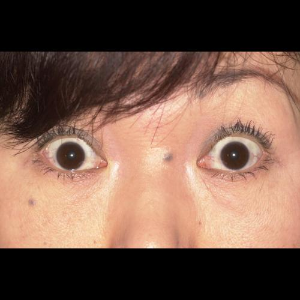

Image_ID：[2]
cont：「0」
grav：「1」
評価を中断する: 「2」
ラベルを入力して下さい1
gravを判定に追加します
全画像を判定済みです。有難うございました。

残り枚数は0枚です。お疲れ様でした！
判定結果の入力間違いがあれば、Image_IDと正しい判定を記載して下さい

バックアップのメールを送信しました


In [1]:
import os
import pandas as pd
import glob
import os.path as osp
import random
from PIL import Image
import sys
import datetime

#サポートパッチのインポート
from google.colab.patches import cv2_imshow
import cv2

#Google colabをマウント
from google.colab import drive
drive.mount('/content/drive')


#モジュール群
def selectName():
    evaluator_list = df.columns.values[2:]

    k=0
    for i in evaluator_list:
        print(str(k)+": "+ i)
        k+= 1
    print(str(k)+": 終了する")
    evaluator = input('名前を選んで下さい')

    if int(evaluator) == k:
        print('ﾌﾟﾛｸﾞﾗﾑを終了します。有難うございました。')
        sys.exit()
    elif int(evaluator) > k:
        raise Exception("表示されている番号を選んで下さい")
        sys.exit()
    elif str.isdigit(evaluator) == False:
        raise Exception("数字を入力して下さい")
    
    return(evaluator)

def confirmName(evaluator, evaluator_list):
    print('\n確認：あなたの名前は'+str(evaluator_list[int(evaluator)+2])+'ですか？')
    confirmName = input('0:はい   1:いいえ   2:中止')
    if confirmName == '0':
        pass
    elif confirmName == '1':
        print('')
        print('')
    elif confirmName == '2':
        print('ﾌﾟﾛｸﾞﾗﾑを終了します。有難うございました')
    return(confirmName)

def getlabel(image_path):
    image_name = int(os.path.basename(image_path).split(".")[0])  #パスから画像番号を抜き出し
    label = os.path.basename(os.path.dirname(image_path))  #パスからラベルのフォルダ名を抜き出し
    return(image_name, label)


def showImage(image_path):
    #画像のインポート
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    #画像のリサイズ
    height = img.shape[0]
    width = img.shape[1]
    resized_img = cv2.resize(img, (int(width*300/height), 300))
    cv2_imshow(resized_img)

def hum_prediction():
    while True:
        print('cont：「0」')
        print('grav：「1」')
        print('評価を中断する: 「2」')
        pred = input('ラベルを入力して下さい')
        if pred == '1':
            hum_pred = 'grav'
            break
        elif pred == '0':
            hum_pred = 'cont'
            break
        elif pred == '2':
            hum_pred = 'exit'
            break
        else:
            print('0-2を入力して下さい')
    return hum_pred 

def loadImages():
    image_path = glob.glob("/content/drive/My Drive/gravcont/*/*")
    #random.shuffle(image_path)  #表示順をランダムにする
    #print(len(image_path))
    #print(image_path) 

    #ファイル名よりラベルを抜き出し、'class_name'と定義
    class_name = []
    class_path = glob.glob('/content/drive/My Drive/gravcont/*')
    for i in class_path:
        class_name.append(os.path.basename(i))  
    return(image_path, class_name)

#ここからメインプログラム

#CSVファイルを開く
df = pd.read_csv('/content/drive/My Drive/Hum_eval.csv', index_col=0, header=0)

#イメージをロードする
image_path, class_name = loadImages() 
image_name_list = []
label_list = []
evaluator_list = df.columns.values
#print(image_path)
print(len(image_path))
print(class_name)

for i in image_path:
    image_name, label = getlabel(i)  #画像の名前とラベルを取得
    image_name_list.append(image_name) #image_nameを番号でリストに格納
    label_list.append(label)

while True:
    evaluator = selectName() #名前を選択
    confirm = confirmName(evaluator, evaluator_list) #名前を確認
    if confirm == '0':
        break
    elif confirm =='2':
        sys.exit()

#人による判定
random.shuffle(image_path)

#Alert
alert = [5,10,30,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]

for i in image_path:   
    #print(i) #画像のパスを表示

    #row = df[df['image_name'] == getlabel(i)[0]] #画像のIDと同じ行を抜き出す
    row = df[df['image_name'] == getlabel(i)[0]] #画像のIDと同じ行を抜き出す
    #print(row)  #画像に一致したCSVの行を表示
    #print(row.iloc[0,int(evaluator)+2])  

    remain_num = df.iloc[:,int(evaluator)+2].isnull().sum() #まだ評価していない画像をカウント
    #print(remain_num)

    if remain_num in alert:
        print('あと'+str(remain_num)+'枚です！\n') 

    if  remain_num == 0: #全画像評価済の場合は終了する　
        print('全画像を判定済みです。有難うございました。')
        break
    elif isinstance(row.iloc[0,int(evaluator)+2], float) == True:  #すでに評価したものはスキップする
        showImage(i) #画像を表示
        #print('Image_ID：'+str(row.iloc[0,0]))
        print('Image_ID：'+str(row.index.values))
        hum_pred = hum_prediction() #ヒトに判定してもらう
        
        if hum_pred == 'exit':
            print('ﾌﾟﾛｸﾞﾗﾑを中断します。有難うございました。')
            break
        else:
            print(hum_pred+'を判定に追加します')
            df.iloc[row.index, int(evaluator)+2] = hum_pred #判定結果を表に追加する
            
remain_num = df.iloc[:,int(evaluator)+2].isnull().sum() #まだ評価していない画像をカウント
print('\n残り枚数は'+str(remain_num)+'枚です。お疲れ様でした！') 

#CSV形式で保存
day = datetime.date.today()
csv_path = '/content/drive/My Drive/Hum_eval.csv'
csv = df.to_csv('/content/drive/My Drive/Hum_eval.csv')



#メールで結果を送信

print('判定結果の入力間違いがあれば、Image_IDと正しい判定を記載して下さい')
massage = input()



from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
import smtplib
from os.path import basename
 
# SMTP認証情報
account = "gravcont@gmail.com"
password = "ted_77777"
 
# 送受信先
to_email = "kitaguchi@yk-gankeisei.com"
from_email = "gravcont@gmail.com"
 
# MIMEの作成
subject = "テストメールGravCont:"+ str(evaluator_list[int(evaluator)+2])
message = str(datetime.datetime.now())+'\n'+massage  #日付と連絡事項
msg = MIMEMultipart()
msg["Subject"] = subject
msg["To"] = to_email
msg["From"] = from_email
msg.attach(MIMEText(message))
  
# ファイルを添付
with open(csv_path, "rb") as f:
    part = MIMEApplication(
        f.read(),
        Name=basename(csv_path)
    )
 
part['Content-Disposition'] = 'attachment; filename="%s"' % basename(csv_path)
msg.attach(part)
 
# メール送信処理
server = smtplib.SMTP("smtp.gmail.com", 587)
server.starttls()
server.login(account, password)
server.send_message(msg)
server.quit()

print("バックアップのメールを送信しました")